In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
cityData = pd.read_csv(city_data_to_load)
rideData = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
MergeData = pd.merge(rideData, cityData, on="city", how="left")

# Display the data table for preview
MergeData.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

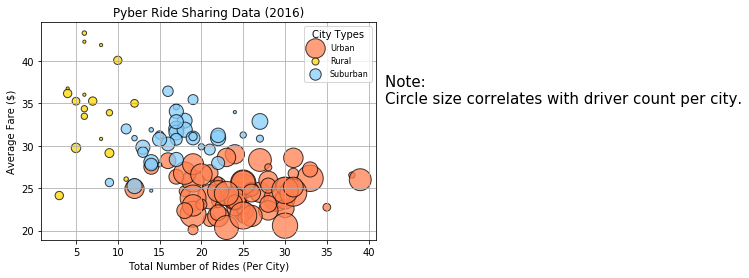

In [2]:
# Obtain the x and y coordinates for each of the three city types + driver counts
urbanCity= MergeData[MergeData["type"] == "Urban"].groupby([MergeData["city"]])
ruralCity= MergeData[MergeData["type"] == "Rural"].groupby([MergeData["city"]])
suburbanCity= MergeData[MergeData["type"] == "Suburban"].groupby([MergeData["city"]])

x_urban = urbanCity["ride_id"].count()
y_urban = urbanCity["fare"].mean()
s_urban = urbanCity["driver_count"].mean()

x_rural = ruralCity["ride_id"].count()
y_rural = ruralCity["fare"].mean()
s_rural = ruralCity["driver_count"].mean()

x_suburban = suburbanCity["ride_id"].count()
y_suburban = suburbanCity["fare"].mean()
s_suburban = suburbanCity["driver_count"].mean()


# Build the scatter plots for each city types
plt.scatter(x_urban, y_urban, label = "Urban" , s=s_urban * 10, color=["coral"], edgecolor="black", alpha = 0.75, marker="o")
plt.scatter(x_rural, y_rural, label = "Rural" , s=s_rural * 10, color=["gold"], edgecolor="black", alpha = 0.75, marker="o")
plt.scatter(x_suburban, y_suburban, label = "Suburban",  s=s_suburban  * 10, color=["lightskyblue"], edgecolor="black", alpha = 0.75, marker="o")
plt.grid()

# Incorporate the other graph properties 
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.title("Pyber Ride Sharing Data (2016)")

# Create a legend
legend = plt.legend(fontsize = 8, title= "City Types", loc="best") 

# Incorporate a text label regarding circle size
plt.text(42,35,"Note: \nCircle size correlates with driver count per city.", fontsize = 15)

# Show plot
plt.show()

## Total Fares by City Type

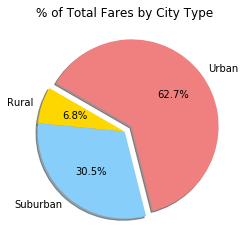

In [3]:
# Calculate Type Percents
Groupped = MergeData.groupby(['type'])
fareSum = Groupped['fare'].sum()


# Build Pie Chart
labels = ["Rural","Suburban","Urban"]
explode = (0, 0, 0.1)
colors = ["gold", "lightskyblue", "lightcoral"]
plt.pie(fareSum, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=150)
plt.title("% of Total Fares by City Type")


# Show Figure
plt.show()

## Total Rides by City Type

Text(0.5, 1.0, '% of Total Rides by City Type')

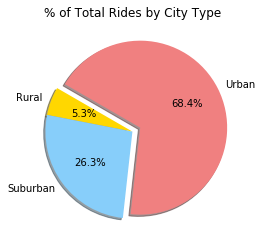

In [4]:
# Calculate Ride Percents
ridePercents = Groupped['ride_id'].count()

# Build Pie Chart
labels = ["Rural","Suburban","Urban"]
explode = (0, 0, 0.1)
colors = ["gold", "lightskyblue", "lightcoral"]
plt.pie( ridePercents , explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=150)
plt.title("% of Total Rides by City Type")



## Total Drivers by City Type

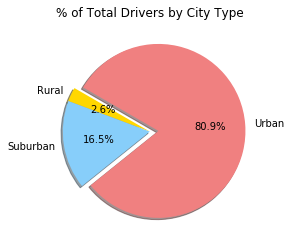

In [5]:
# Calculate Driver Percents
GrouppedDrivers = cityData.groupby(['type'])
TotalDrivers = GrouppedDrivers['driver_count'].sum()

# Build Pie Chart
labels = ["Rural","Suburban","Urban"]
explode = (0, 0, 0.1)
colors = ["gold", "lightskyblue", "lightcoral"]
plt.pie(TotalDrivers, explode=explode, labels=labels, colors=colors,autopct="%1.1f%%", shadow=True, startangle=150)
plt.title("% of Total Drivers by City Type")


# Show Figure
plt.show()

